# Test Astropy

- https://github.com/laingmic005/aperture-photometry/blob/main/L1_fits-handling.ipynb

- https://youtu.be/_DzSIeruotQ?si=ScAl1J5rSqyIt_ap

- https://archive.stsci.edu/prepds/hugs/

## 1.1 Fits 파일 불러오기

In [1]:
from astropy.io import fits

In [2]:
# fits 파일 열기 
fits_file = fits.open('ngc1261.fits')

In [3]:
print(fits_file)

In [4]:
image_data = fits_file[0].data
print(image_data)

[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]


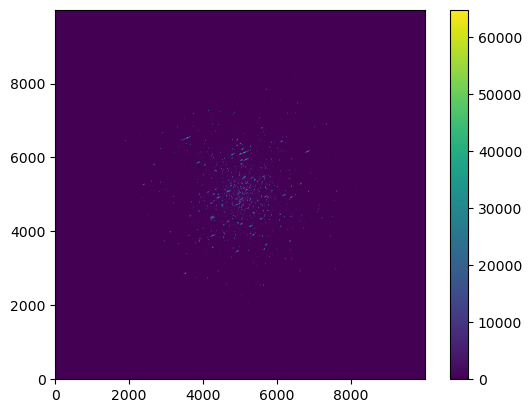

In [5]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data, origin = 'lower')
plt.colorbar()
plt.show()

In [6]:
image_data_center = image_data[4000:6000, 4000:6000]

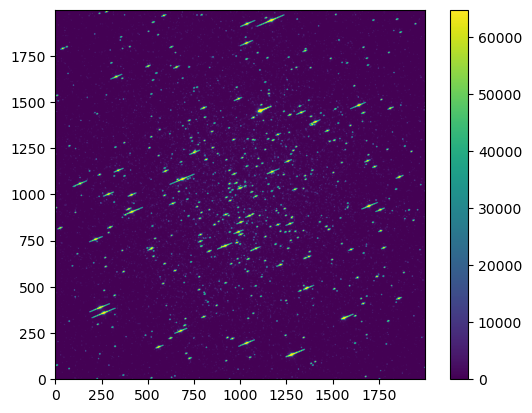

In [7]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center, origin = 'lower')
plt.colorbar()
plt.show()

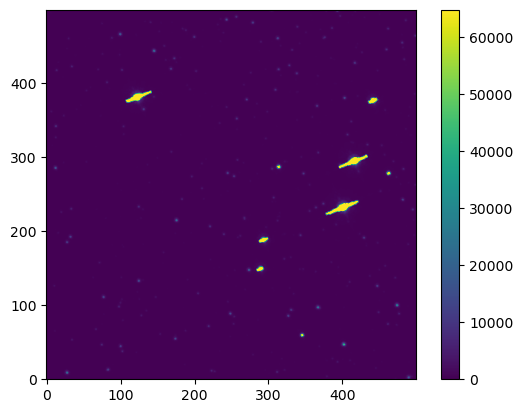

In [8]:
# 원하는 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data[3500:4000, 3500:4000], origin = 'lower')
plt.colorbar()
plt.show()

- plt.imshow()에서 origin의 역할
  
> plt.imshow() 함수에서 origin 매개변수는 이미지를 표시할 때 픽셀 좌표 시스템의 원점을 어디에 두는지를 지정하는 역할을 합니다. 이 매개변수는 이미지의 표시 방향을 제어하기 위해 사용됩니다.
>
> origin='upper' (기본값): 좌측 상단 모서리를 원점으로 간주합니다. 이 경우, 픽셀 좌표는 왼쪽 상단 모서리에서 시작하여 아래쪽으로 행이 증가하고 오른쪽으로 열이 증가합니다. 이것은 일반적인 이미지 표시 방식과는 다릅니다.
>
> origin='lower': 좌측 하단 모서리를 원점으로 간주합니다. 이 경우, 픽셀 좌표는 왼쪽 하단 모서리에서 시작하여 위쪽으로 행이 증가하고 오른쪽으로 열이 증가합니다. 이것은 일반적인 이미지 표시 방식과 일치합니다.
>
> 대부분의 경우, 이미지 데이터는 origin='upper'로 저장되어 있기 때문에 origin 매개변수를 따로 지정할 필요가 없습니다. 그러나 이미지 데이터가 origin='lower'로 저장되어 있는 경우, 표시 방식을 올바르게 하기 위해 이 매개변수를 설정할 수 있습니다.

저기 은하처럼 보이는 것은 천체 사진의 회절잔상(diffraction pattern)인가? 모르겠다. 은하인가?

## 1.2 그레이 스케일로 나타내기

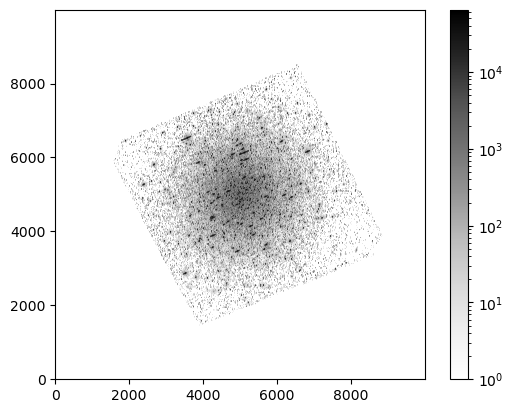

In [9]:
# cmap을 'Greys'로 바꾸고 norm을 LogNorm으로 바꾸기
# 데이터의 범위, order가 넓다 보니 LogNorm으로 정규화함

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(image_data, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

In [10]:
# 데이터의 작은 부분에 집중하기 위해 이미지에서 x와 y의 범위를 선택함
# 특정 영역에 포커싱해서 fits 이미지를 살펴보기 위함임 
'''
이러한 정보를 알면 이미지에서 작은 부분을 선택하거나 원하는 영역을 정확하게 설정하는 데 도움이 됩니다. 
이것은 이미지 처리나 분석 작업에서 중요한 단계일 수 있으며, 특히 이미지에서 특정 관심 영역을 추출하려는 경우에 유용합니다.
'''

# 전체 dimension을 확인하기 위해 info() 함수를 사용 
fits_file.info() 

Filename: ngc1261.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   (10000, 10000)   float32   


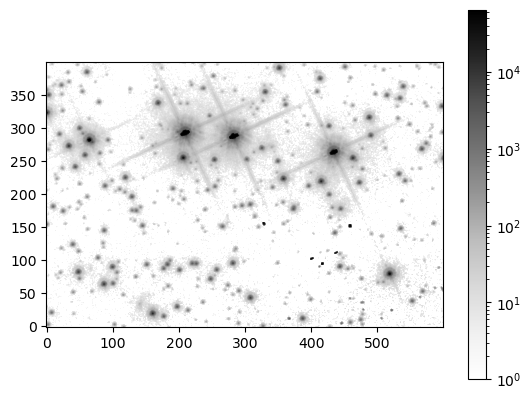

In [11]:
# 데이터의 일부분을 추출하여 matplotlib으로 시각화 해보기
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# 추출하는 형태는 다음과 같음 
# "image_data[y1:y2, x1:x2]"
# 왜냐하면 행렬에서 행은 사진의 y축을, 열은 사진의 x축을 나타내므로

section1 = image_data[2250:2650, 5350:5950]

# plt.imshow "section1" 
plt.figure()
plt.imshow(section1, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

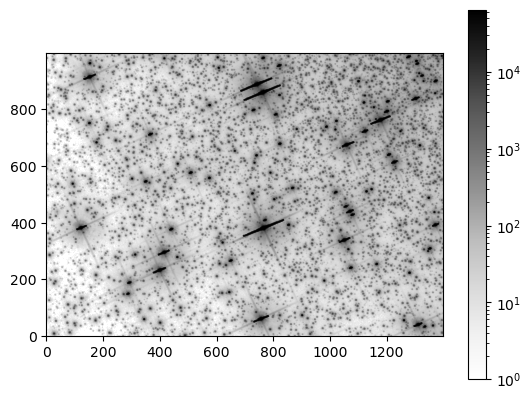

In [12]:
# 다른 섹션도 나타내보기
section2 = image_data[3500:4500, 3500:4900]

# plt.imshow "section1" 
plt.figure()
plt.imshow(section2, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

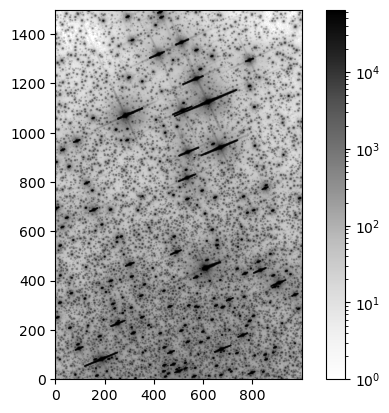

In [13]:
# 다른 섹션도 나타내보기
section3 = image_data[5000:6500, 4500:5500]

# plt.imshow "section1" 
plt.figure()
plt.imshow(section3, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

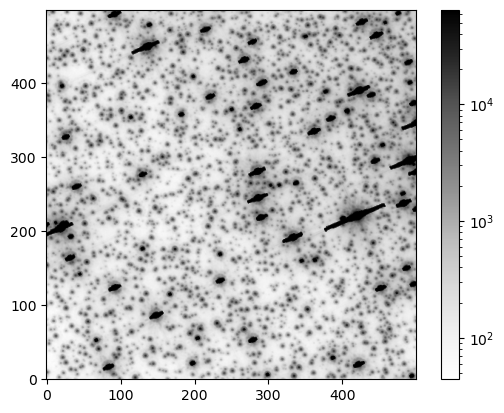

In [14]:
# 다른 섹션도 나타내보기
section4 = image_data[4500:5000, 4500:5000]

# plt.imshow "section1" 
plt.figure()
plt.imshow(section4, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

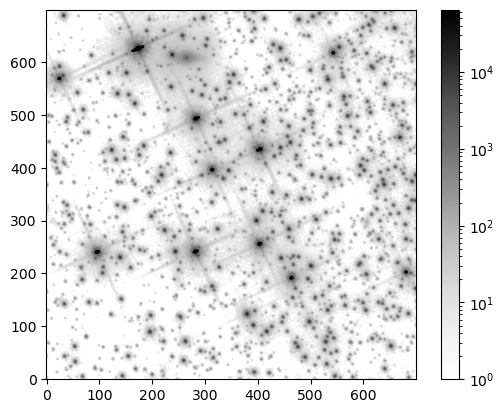

In [15]:
# 다른 섹션도 나타내보기
section4 = image_data[4500:5200, 2800:3500]

# plt.imshow "section1" 
plt.figure()
plt.imshow(section4, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

# 2. Photutils-detection

* Photutils: An Astropy Package for Photometry

> `Photutils`는 파이썬의 과학 이미지 처리 및 천체학 이미지 분석을 위한 패키지입니다. 'photutils'는 다양한 이미 처리 작업에 사용되며, 주로 천문학에서 물체의 위치, 밝기, 크기 및 형태를 추출하고 측정하는 데 사용됩니다. 다음은 photutils의 주요 기능과 몇 가지 예시입니다:
> 
> 1. **Aperture Photometry**: photutils를 사용하여 이미지에서 특정 물체 주위의 원 또는 타원 모양의 영역(아파처)을 정의하고 해당 아파처 내의 픽셀 값을 합산하여 물체의 밝기를 측정할 수 있습니다. 이것은 천체학적 객체의 등급 측정에 유용합니다.
> 
> 2. **PSF Photometry**: Point Spread Function (PSF) 기반의 천체 항목 검출 및 등급 측정을 수행합니다. 이것은 천체학 이미지에서 별과 같은 지점 소스를 분석하는 데 사용됩니다.
>
> 3. **Background Subtraction**: 이미지에서 백그라운드 레벨을 추정하고 이를 천체학적 객체의 밝기 측정에 사용할 수 있습니다.
>
> 4. **Detection and Segmentation**: 물체를 감지하고 분할(segment)하는 도구를 제공합니다. 물체의 위치를 식별하고 관심 물체를 분리하는 데 사용됩니다.
> 
> 5. **Photometry Algorithms**: 여러 가지 다양한 천체학적 등급 측정 알고리즘을 제공하며 사용자는 필요에 따라 선택할 수 있습니다.
> 
> photutils는 간단한 작업부터 복잡한 이미지 분석 작업까지 다양한 천체학적 이미지 처리 작업을 수행할 수 있는 강력한 도구를 제공합니다. 이 패키지는 과학 연구 및 천체학 연구에서 자주 사용되며, 파이썬으로 이미지 처리 및 분석을 수행하려는 연구자 및 과학자에게 유용합니다.

In [16]:
'''find mean, median and standard deviation'''

from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(section1, sigma = 3.0)

# print data
print(mean, median, std)

1.6487273 0.0 8.310026


In [18]:
'''Use DAOStarFinder to detect stars'''

from photutils.detection import DAOStarFinder

# find stars that have a full-width-half-maximum of about 3 pixels and are at least 5 sigma above the background level
daofind = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std)

# define table named "sources"
sources = daofind(section1 - median)

# format sources table 
for col in sources.colnames:
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources.pprint(max_width = 76)

 id xcentroid ycentroid sharpness roundness1 ... sky    peak   flux  mag 
--- --------- --------- --------- ---------- ... ---- ------- ----- -----
  1    117.20      0.34      0.88      -0.20 ... 0.00  199.00  3.38 -1.32
  2    428.44      0.36      0.77      -0.29 ... 0.00  168.00  2.93 -1.17
  3    327.47      1.06      0.51       0.02 ... 0.00  619.00 13.01 -2.79
  4      2.78      3.20      0.49      -0.01 ... 0.00  660.00 13.98 -2.86
  5    103.18      3.44      0.66       0.10 ... 0.00  407.00  7.17 -2.14
  6    477.76      3.68      0.59       0.00 ... 0.00  258.00  4.72 -1.68
  7    290.51      5.25      0.46       0.19 ... 0.00  302.00  6.52 -2.04
  8    446.31      5.24      0.77       0.39 ... 0.00 1772.00 33.91 -3.83
  9    459.62      6.53      0.70       0.45 ... 0.00  960.00 15.98 -3.01
 10    241.68      7.76      0.53       0.21 ... 0.00  113.00  2.45 -0.97
 11    226.11     10.55      0.72       0.28 ... 0.00   66.00  1.21 -0.21
 12    475.26     10.63      0.33     

In [ ]:
# visualize deteted stars with matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

# define star positions based on sources table, then draw 
# apertures around each position (radius 5) and plot data 

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = Circular 